# Data Importing, Cleansing and Transformation

## A. Importing Data

In [ ]:
# import packages
import pandas as pd
import numpy as np

In [ ]:
# import dataset
from google.colab import drive
drive.mount('/content/gdrive')
airbnb = pd.read_csv('gdrive/MyDrive/Airbnb_Open_Data.csv')

Mounted at /content/gdrive


<ipython-input-2-8048f46a1452>:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('gdrive/MyDrive/Airbnb_Open_Data.csv')


In [ ]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
airbnb.shape

(102599, 26)

## B. Dropping Valueless Columns

### 1. License

We got only 2 non-null values for license column, so just drop it.

In [ ]:
airbnb.drop(columns=['license'], axis=1, inplace=True)

In [ ]:
airbnb.shape

(102599, 25)

### 2. Country and country code

In [ ]:
airbnb.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [ ]:
print(airbnb['country'].value_counts())
print(airbnb['country code'].value_counts())

United States    102067
Name: country, dtype: int64
US    102468
Name: country code, dtype: int64


As this dataset only contains united states based records, country and country code are redundant and I decided to drop them.

In [ ]:
airbnb.drop(columns=['country', 'country code'], axis=1, inplace=True)

In [ ]:
airbnb.shape

(102599, 23)

### 3. Id and host id

id and host id are two unique identifiers without actual meanings. I decided to drop them here.

In [ ]:
airbnb.drop(columns=['id', 'host id'], axis=1, inplace=True)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   lat                             102591 non-null  float64
 6   long                            102591 non-null  float64
 7   instant_bookable                102494 non-null  object 
 8   cancellation_policy             102523 non-null  object 
 9   room type                       102599 non-null  object 
 10  Construction year               102385 non-null  float64
 11  price                           102352 non-null  object 
 12  service fee     

In [ ]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [ ]:
airbnb['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [ ]:
airbnb['neighbourhood'].value_counts()

Bedford-Stuyvesant        7937
Williamsburg              7775
Harlem                    5466
Bushwick                  4982
Hell's Kitchen            3965
                          ... 
Rossville                    3
Lighthouse Hill              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

## C. Examining Each Remaining Column

For all the remaining 22 features, I decided to examin column by column, then do cleaning based on null values, outliers, wrong format, etc.

### 1. Name and location related
 - null values: dropped

As for NAME, host name, neighbourhood, neighbourhood group, lat and long, the null values only account for less than 1%. Besides as they are unique representation for each specific record, it makes no sense using any imputing strategy. So I dropped records with null values in above.

In [ ]:
airbnb.dropna(subset=['NAME', 'host name', 'neighbourhood', 'neighbourhood group', 'lat', 'long'], inplace=True)

In [ ]:
airbnb.shape

(101899, 21)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101899 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            101899 non-null  object 
 1   host_identity_verified          101630 non-null  object 
 2   host name                       101899 non-null  object 
 3   neighbourhood group             101899 non-null  object 
 4   neighbourhood                   101899 non-null  object 
 5   lat                             101899 non-null  float64
 6   long                            101899 non-null  float64
 7   instant_bookable                101806 non-null  object 
 8   cancellation_policy             101832 non-null  object 
 9   room type                       101899 non-null  object 
 10  Construction year               101703 non-null  float64
 11  price                           101662 non-null  object 
 12  service fee     

In [ ]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,...,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs."


### 2. Identity, instant and cancellation policy
- null values: used random value within class to impute

In [ ]:
print(airbnb['host_identity_verified'].value_counts())
print(airbnb['instant_bookable'].value_counts())
print(airbnb['cancellation_policy'].value_counts())

unconfirmed    50867
verified       50763
Name: host_identity_verified, dtype: int64
False    51130
True     50676
Name: instant_bookable, dtype: int64
moderate    34113
strict      33864
flexible    33855
Name: cancellation_policy, dtype: int64


These three categorical variables have balanced classes, and very small proportion of null values. Thus I decided to randomly impute their nulls with existing classes.

In [ ]:
# Generate categories and proportions for each column
categories_host_identity = airbnb['host_identity_verified'].dropna().unique()
proportions_host_identity = airbnb['host_identity_verified'].value_counts(normalize=True)

categories_instant_bookable = airbnb['instant_bookable'].dropna().unique()
proportions_instant_bookable = airbnb['instant_bookable'].value_counts(normalize=True)

categories_cancellation_policy = airbnb['cancellation_policy'].dropna().unique()
proportions_cancellation_policy = airbnb['cancellation_policy'].value_counts(normalize=True)

# Create a function to perform random imputation
def random_imputation(value, categories, proportions):
    if pd.isnull(value):
        return np.random.choice(categories, p=proportions)
    else:
        return value

# Apply random imputation to the 'host_identity_verified' column
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].apply(random_imputation, args=(categories_host_identity, proportions_host_identity))

# Apply random imputation to the 'instant_bookable' column
airbnb['instant_bookable'] = airbnb['instant_bookable'].apply(random_imputation, args=(categories_instant_bookable, proportions_instant_bookable))

# Apply random imputation to the 'cancellation_policy' column
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].apply(random_imputation, args=(categories_cancellation_policy, proportions_cancellation_policy))


In [ ]:
print(airbnb['host_identity_verified'].value_counts())
print(airbnb['instant_bookable'].value_counts())
print(airbnb['cancellation_policy'].value_counts())

unconfirmed    50999
verified       50900
Name: host_identity_verified, dtype: int64
False    51178
True     50721
Name: instant_bookable, dtype: int64
moderate    34134
strict      33884
flexible    33881
Name: cancellation_policy, dtype: int64


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101899 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            101899 non-null  object 
 1   host_identity_verified          101899 non-null  object 
 2   host name                       101899 non-null  object 
 3   neighbourhood group             101899 non-null  object 
 4   neighbourhood                   101899 non-null  object 
 5   lat                             101899 non-null  float64
 6   long                            101899 non-null  float64
 7   instant_bookable                101899 non-null  bool   
 8   cancellation_policy             101899 non-null  object 
 9   room type                       101899 non-null  object 
 10  Construction year               101703 non-null  float64
 11  price                           101662 non-null  object 
 12  service fee     

### 3. Numeric Features
- null values: used median to impute
- format: removed dollar signs for price and service fee, then transformed them from string to float

To start with, I first removed the dollar sign in front of the records in price and service fee columns, then transformed them to float data type.


In [ ]:
# Remove dollar signs
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['service fee'] = airbnb['service fee'].str.replace('$', '')

# Convert columns to float64
airbnb['price'] = pd.to_numeric(airbnb['price'], errors='coerce')
airbnb['service fee'] = pd.to_numeric(airbnb['service fee'], errors='coerce')

<ipython-input-25-ae4bb10b103c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['price'] = airbnb['price'].str.replace('$', '')
<ipython-input-25-ae4bb10b103c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['service fee'] = airbnb['service fee'].str.replace('$', '')


In [ ]:
nums = airbnb[['Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']]

In [ ]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101899 entries, 0 to 102598
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Construction year               101703 non-null  float64
 1   price                           83884 non-null   float64
 2   service fee                     101631 non-null  float64
 3   minimum nights                  101498 non-null  float64
 4   number of reviews               101717 non-null  float64
 5   reviews per month               86139 non-null   float64
 6   review rate number              101587 non-null  float64
 7   calculated host listings count  101581 non-null  float64
 8   availability 365                101490 non-null  float64
dtypes: float64(9)
memory usage: 7.8 MB


In [ ]:
nums.describe()

,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,101703.000000,83884.000000,101631.000000,101498.000000,101717.000000,86139.000000,101587.000000,101581.000000,101490.000000
mean,2012.486151,524.746495,125.026429,8.120554,27.458842,1.375280,3.279002,7.950414,141.236073
std,5.764768,273.410969,66.315536,30.314268,49.462561,1.748462,1.284885,32.288626,135.425048
min,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2007.000000,288.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2012.000000,524.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,97.000000
75%,2017.000000,759.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,2022.000000,999.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


As shown in the summary statistics, minumum nights, number of reviews, reviews per month, host listings count and availability all have outlier problems. So I would remove those outliers based on percentile method first. 

In [ ]:
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper thresholds for each column
lower_threshold_nights = airbnb['minimum nights'].quantile(lower_percentile / 100)
upper_threshold_nights = airbnb['minimum nights'].quantile(upper_percentile / 100)

lower_threshold_reviews = airbnb['number of reviews'].quantile(lower_percentile / 100)
upper_threshold_reviews = airbnb['number of reviews'].quantile(upper_percentile / 100)

lower_threshold_reviewspermonth = airbnb['reviews per month'].quantile(lower_percentile / 100)
upper_threshold_reviewspermonth = airbnb['reviews per month'].quantile(upper_percentile / 100)

lower_threshold_hostcount = airbnb['calculated host listings count'].quantile(lower_percentile / 100)
upper_threshold_hostcount = airbnb['calculated host listings count'].quantile(upper_percentile / 100)

lower_threshold_availability = airbnb['availability 365'].quantile(lower_percentile / 100)
upper_threshold_availability = airbnb['availability 365'].quantile(upper_percentile / 100)

# Filter the DataFrame based on the calculated thresholds
airbnb = airbnb[
    (airbnb['minimum nights'] >= lower_threshold_nights) & (airbnb['minimum nights'] <= upper_threshold_nights) &
    (airbnb['number of reviews'] >= lower_threshold_reviews) & (airbnb['number of reviews'] <= upper_threshold_reviews) &
    (airbnb['reviews per month'] >= lower_threshold_reviewspermonth) & (airbnb['reviews per month'] <= upper_threshold_reviewspermonth) &
    (airbnb['calculated host listings count'] >= lower_threshold_hostcount) & (airbnb['calculated host listings count'] <= upper_threshold_hostcount) &
    (airbnb['availability 365'] >= lower_threshold_availability) & (airbnb['availability 365'] <= upper_threshold_availability)
]

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67095 entries, 0 to 102593
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            67095 non-null  object 
 1   host_identity_verified          67095 non-null  object 
 2   host name                       67095 non-null  object 
 3   neighbourhood group             67095 non-null  object 
 4   neighbourhood                   67095 non-null  object 
 5   lat                             67095 non-null  float64
 6   long                            67095 non-null  float64
 7   instant_bookable                67095 non-null  bool   
 8   cancellation_policy             67095 non-null  object 
 9   room type                       67095 non-null  object 
 10  Construction year               66992 non-null  float64
 11  price                           55185 non-null  float64
 12  service fee                    

In [ ]:
airbnb.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,67095.000000,67095.000000,66992.000000,55185.000000,66910.000000,67095.000000,67095.000000,67095.000000,66953.000000,67095.000000,67095.000000
mean,40.726391,-73.947074,2012.485043,524.895678,125.146241,5.960176,23.119860,1.125921,3.296357,2.274208,129.099486
std,0.057643,0.051024,5.758129,272.705121,66.263307,8.656649,27.901713,1.097752,1.272460,3.050643,128.081484
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,1.000000,1.000000,0.050000,1.000000,1.000000,0.000000
25%,40.686490,-73.980645,2007.000000,290.000000,68.000000,2.000000,4.000000,0.250000,2.000000,1.000000,2.000000
50%,40.719670,-73.952540,2012.000000,524.000000,125.000000,3.000000,11.000000,0.720000,3.000000,1.000000,87.000000
75%,40.762540,-73.929365,2017.000000,758.000000,183.000000,5.000000,32.000000,1.720000,4.000000,2.000000,243.000000
max,40.916970,-73.705220,2022.000000,999.000000,240.000000,30.000000,125.000000,4.550000,5.000000,29.000000,365.000000


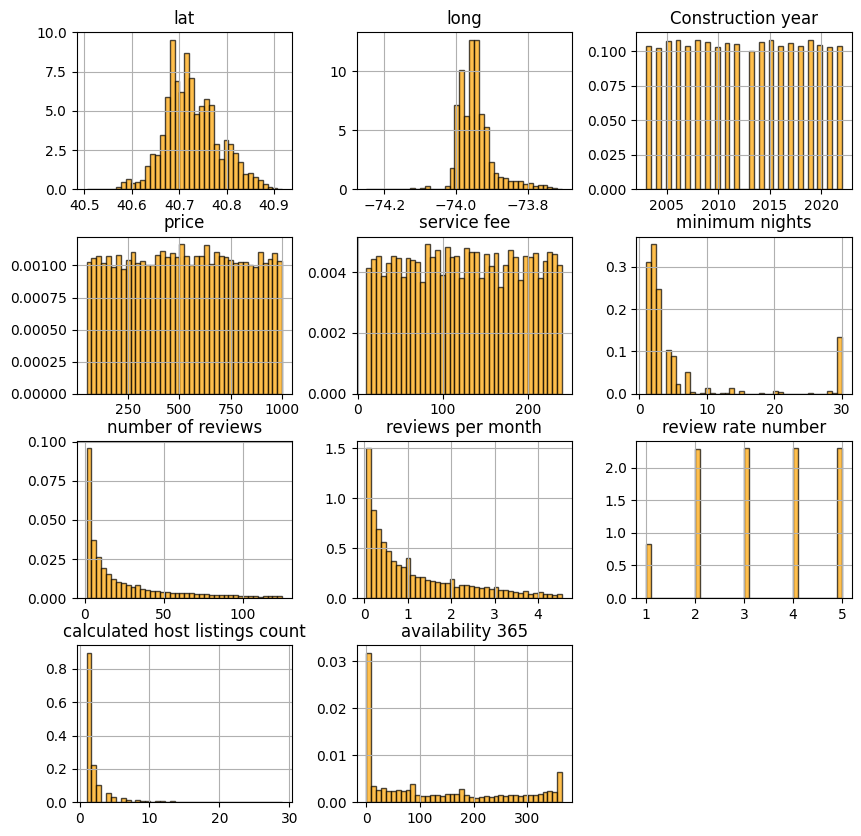

In [ ]:
# Plot a histogram of all numeric features
ax = airbnb.hist(bins=40, density=True, facecolor="orange", 
                        edgecolor="black", alpha=0.7, figsize=(10, 10))

Now we see that, the outlier problems have been largely alleviated. Next is to take care of the nulls. As most of the numeric variables are right skewed, I decided to use impute the nulls with median.

In [ ]:
# Calculate the median for each column
median_price = airbnb['price'].median()
median_fee = airbnb['service fee'].median()
median_minimum_nights = airbnb['minimum nights'].median()
median_number_of_reviews = airbnb['number of reviews'].median()
median_reviews_per_month = airbnb['reviews per month'].median()
median_calculated_host_listings_count = airbnb['calculated host listings count'].median()
median_availability_365 = airbnb['availability 365'].median()
median_construction_year = airbnb['Construction year'].median()
median_review_rate = airbnb['review rate number'].median()


# Impute the null values with the respective column medians
airbnb['price'].fillna(median_price, inplace=True)
airbnb['service fee'].fillna(median_fee, inplace=True)
airbnb['minimum nights'].fillna(median_minimum_nights, inplace=True)
airbnb['number of reviews'].fillna(median_number_of_reviews, inplace=True)
airbnb['reviews per month'].fillna(median_reviews_per_month, inplace=True)
airbnb['calculated host listings count'].fillna(median_calculated_host_listings_count, inplace=True)
airbnb['availability 365'].fillna(median_availability_365, inplace=True)
airbnb['Construction year'].fillna(median_construction_year, inplace=True)
airbnb['review rate number'].fillna(median_review_rate, inplace=True)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67095 entries, 0 to 102593
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            67095 non-null  object 
 1   host_identity_verified          67095 non-null  object 
 2   host name                       67095 non-null  object 
 3   neighbourhood group             67095 non-null  object 
 4   neighbourhood                   67095 non-null  object 
 5   lat                             67095 non-null  float64
 6   long                            67095 non-null  float64
 7   instant_bookable                67095 non-null  bool   
 8   cancellation_policy             67095 non-null  object 
 9   room type                       67095 non-null  object 
 10  Construction year               67095 non-null  float64
 11  price                           67095 non-null  float64
 12  service fee                    

In [ ]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
11,Beautiful 1br on Upper West Side,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,True,flexible,Entire home/apt,...,606.0,121.0,5.0,53.0,6/22/2019,0.43,4.0,1.0,163.0,"My ideal guests would be warm, friendly, and r..."
14,Wonderful Guest Bedroom in Manhattan for SINGLES,verified,Leonardo,Manhattan,Upper West Side,40.79826,-73.96113,False,flexible,Private room,...,149.0,30.0,2.0,113.0,7/5/2019,0.91,3.0,1.0,68.0,NaN


### 4. Last review
- null values: dropped
- format: transformed to time stamp

As last review column now only includes 3 nulls, I would simply drop them, and then transform the column to datetime

In [ ]:
airbnb.dropna(subset=['last review'], inplace=True)

In [ ]:
airbnb['last review'] = pd.to_datetime(airbnb['last review'], format='%m/%d/%Y')

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67092 entries, 0 to 102593
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NAME                            67092 non-null  object        
 1   host_identity_verified          67092 non-null  object        
 2   host name                       67092 non-null  object        
 3   neighbourhood group             67092 non-null  object        
 4   neighbourhood                   67092 non-null  object        
 5   lat                             67092 non-null  float64       
 6   long                            67092 non-null  float64       
 7   instant_bookable                67092 non-null  bool          
 8   cancellation_policy             67092 non-null  object        
 9   room type                       67092 non-null  object        
 10  Construction year               67092 non-null  float64       
 11  p

In [ ]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
11,Beautiful 1br on Upper West Side,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,True,flexible,Entire home/apt,...,606.0,121.0,5.0,53.0,2019-06-22,0.43,4.0,1.0,163.0,"My ideal guests would be warm, friendly, and r..."
14,Wonderful Guest Bedroom in Manhattan for SINGLES,verified,Leonardo,Manhattan,Upper West Side,40.79826,-73.96113,False,flexible,Private room,...,149.0,30.0,2.0,113.0,2019-07-05,0.91,3.0,1.0,68.0,NaN


### 5. House rules

Lastly, for house_rules column, I decided to use "Not Specified" to replace the nulls, which are likely representing no additional rules.

In [ ]:
airbnb['house_rules'].fillna('Not Specified', inplace=True)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67092 entries, 0 to 102593
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NAME                            67092 non-null  object        
 1   host_identity_verified          67092 non-null  object        
 2   host name                       67092 non-null  object        
 3   neighbourhood group             67092 non-null  object        
 4   neighbourhood                   67092 non-null  object        
 5   lat                             67092 non-null  float64       
 6   long                            67092 non-null  float64       
 7   instant_bookable                67092 non-null  bool          
 8   cancellation_policy             67092 non-null  object        
 9   room type                       67092 non-null  object        
 10  Construction year               67092 non-null  float64       
 11  p

In [ ]:
airbnb.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
11,Beautiful 1br on Upper West Side,verified,Alan,Manhattan,Upper West Side,40.80316,-73.96545,True,flexible,Entire home/apt,...,606.0,121.0,5.0,53.0,2019-06-22,0.43,4.0,1.0,163.0,"My ideal guests would be warm, friendly, and r..."
14,Wonderful Guest Bedroom in Manhattan for SINGLES,verified,Leonardo,Manhattan,Upper West Side,40.79826,-73.96113,False,flexible,Private room,...,149.0,30.0,2.0,113.0,2019-07-05,0.91,3.0,1.0,68.0,Not Specified


The data is clean now, with 20 columns each with 67092 non-null values.

## D. Feature Engineering

The last procedure would be feature engineering. I would treat price and service fee as outcome variables, then conduct normalization for some numerical independent variables and one-hot encoding for some categorical independent variables. What is noteworthy is that the procedure of feature engineering varies a lot due to different analysis purpose. What I would do here is just doing necessary transformation for columns that would be useful for a regression problem, and leaving other columns as they used to be. So if one wants to conduct a regression analysis, he or she could simply select specific transformed columns for further usage; and if one wants to conduct other kinds of analysis, like NLP or geographical-based EDA, corresponding variables, including lat and long, house_rules could be used as well.

First, I would transform Conduction year and last review to years and days till now, which would be more convenient for future analysis.

In [ ]:
import datetime

# Transform Construction year to how many years to now
current_year = datetime.datetime.now().year
airbnb['Construction year'] = current_year - airbnb['Construction year']

In [ ]:
# Transform last review to how many days to now
current_date = datetime.datetime.now().date()
airbnb['last review'] = pd.to_datetime(airbnb['last review']).dt.date
airbnb['last review'] = (current_date - airbnb['last review']).dt.days

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67092 entries, 0 to 102593
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            67092 non-null  object 
 1   host_identity_verified          67092 non-null  object 
 2   host name                       67092 non-null  object 
 3   neighbourhood group             67092 non-null  object 
 4   neighbourhood                   67092 non-null  object 
 5   lat                             67092 non-null  float64
 6   long                            67092 non-null  float64
 7   instant_bookable                67092 non-null  bool   
 8   cancellation_policy             67092 non-null  object 
 9   room type                       67092 non-null  object 
 10  Construction year               67092 non-null  float64
 11  price                           67092 non-null  float64
 12  service fee                    

Now, we have 4 categorical features to conduct one-hot encoding: host_identity_verified, instant_bookable, cancellation_policy, room type; and 
8 numerical features to normalize: Construction year, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform one-hot encoding on categorical features
encoded_features = pd.get_dummies(airbnb[['host_identity_verified', 'instant_bookable', 'cancellation_policy', 'room type']])

# Drop original categorical columns
airbnb = airbnb.drop(columns=['host_identity_verified', 'instant_bookable', 'cancellation_policy', 'room type'])

# Standard scale numerical features
numerical_features = ['Construction year', 'minimum nights', 'number of reviews', 'last review', 'reviews per month',
                      'review rate number', 'calculated host listings count', 'availability 365']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(airbnb[numerical_features])
scaled_features = pd.DataFrame(scaled_features, columns=numerical_features)

# Concatenate the encoded features and scaled numerical features with the original DataFrame
airbnb_final = pd.concat([airbnb.drop(columns=numerical_features), encoded_features, scaled_features], axis=1)

In [ ]:
airbnb_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91772 entries, 0 to 67091
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NAME                                67092 non-null  object 
 1   host name                           67092 non-null  object 
 2   neighbourhood group                 67092 non-null  object 
 3   neighbourhood                       67092 non-null  object 
 4   lat                                 67092 non-null  float64
 5   long                                67092 non-null  float64
 6   price                               67092 non-null  float64
 7   service fee                         67092 non-null  float64
 8   house_rules                         67092 non-null  object 
 9   instant_bookable                    67092 non-null  object 
 10  host_identity_verified_unconfirmed  67092 non-null  float64
 11  host_identity_verified_verified     67092

In [ ]:
airbnb_final.head()

,NAME,host name,neighbourhood group,neighbourhood,lat,long,price,service fee,house_rules,instant_bookable,...,room type_Private room,room type_Shared room,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,Madaline,Brooklyn,Kensington,40.64749,-73.97237,966.0,193.0,Clean up and treat the home the way you'd like...,False,...,1.0,0.0,-1.306222,0.466657,-0.506069,-1.579933,-0.834389,0.554051,1.221281,1.225025
1,Skylit Midtown Castle,Jenna,Manhattan,Midtown,40.75362,-73.98377,142.0,28.0,Pet friendly but please confirm with me if the...,False,...,0.0,0.0,0.953168,2.776991,0.784160,-1.984922,-0.679528,0.554051,-0.089903,0.772184
4,Entire Apt: Spacious Studio/Loft by central park,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,204.0,41.0,"Please no smoking in the house, porch or on th...",False,...,0.0,0.0,-1.132422,-0.457477,3.221259,0.004066,-0.196724,-0.232616,-0.417699,-0.477033
11,Beautiful 1br on Upper West Side,Alan,Manhattan,Upper West Side,40.80316,-73.96545,606.0,121.0,"My ideal guests would be warm, friendly, and r...",True,...,0.0,0.0,-1.480021,-0.341960,3.042061,0.041915,-0.014534,-0.232616,0.237893,0.334958
14,Wonderful Guest Bedroom in Manhattan for SINGLES,Leonardo,Manhattan,Upper West Side,40.79826,-73.96113,149.0,30.0,Not Specified,False,...,1.0,0.0,-0.611025,-0.572993,1.823511,0.106259,-0.424462,-0.232616,-0.089903,-0.414572


In [ ]:
airbnb_final.to_csv('gdrive/MyDrive/Airbnb_Open_Data_Cleaned.csv', index=False)

airbnb_final would be the final cleaed data.

# Summary

Steps taken are as follows:


1.   Dropped meaningless columns directly.
2.   Based on characteristics of features, used dropping, median imputation, random imputation and N/A imputation respectively to deal with null values.
3.   Filtered out outliers for numerical features using percentile method.
4.   Removed dollars signs then transformed price, service fee columns from strings to floats data type; transformed last review column from float to datetime.
5.   Feature engineered by transforming Conduction year and last review to years and days till now to facilitate regression analysis
6.   One-hot encoded categorical features and standardized numerical features to facilitate regression analysis.


